| **Scenario**                           | **Recommendation**                                      |
|----------------------------------------|----------------------------------------------------------|
| Using distance-based algorithms        | Scale all numeric features, including distinct ones, to ensure equal contribution to distance calculations. |
| Using tree-based algorithms             | No need to scale; tree-based algorithms are not sensitive to feature scales. |
| Using gradient boosting algorithms      | Scaling may be beneficial, though less critical than for distance-based algorithms. Experiment and evaluate impact on performance. |
| Maintaining ordinal relationship       | Consider normalization to a range between 0 and 1 instead of standard scaling. |
| Evaluating impact on model performance | Experiment with and without scaling; assess impact on metrics like accuracy, precision, recall, or F1 score. |


In [76]:
# !pip install imblearn
# !pip install imbalanced-learn

In [77]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class/PG WD-45/Fraud-Detection/Test-Zone/FD-Dataset-2.csv')
d

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,MainEntityUse,Fraud,TransactionDay,TransactionMonth,...,TransactionTimeOfDay_Morning,TransactionTimeOfDay_Night,AddressUpdateTimeOfDay_Evening,AddressUpdateTimeOfDay_Morning,AddressUpdateTimeOfDay_Night,EmailUpdateTimeOfDay_Evening,EmailUpdateTimeOfDay_Morning,EmailUpdateTimeOfDay_Night,DeviceCategory_Not_Old_Device,DeviceCategory_Old_Device
0,99,98,10,803,19820,602.0000,351.0033,0,23,5,...,0,0,0,1,0,0,0,0,1,0
1,99,94,61,602,16980,512.0000,315.0000,0,27,5,...,1,0,0,0,0,1,0,0,1,0
2,76,95,66,505,35620,407.0000,333.0000,0,23,5,...,0,0,0,0,1,0,0,1,0,1
3,99,23,50,0,35620,202.0000,327.0000,0,31,5,...,0,0,0,0,0,0,0,0,0,1
4,99,74,80,602,19100,313.0000,394.0000,0,1,6,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138367,86,85,80,602,0,630.0000,406.0000,0,26,5,...,1,0,0,1,0,0,0,0,0,1
138368,99,97,90,527,41860,630.0000,360.0000,0,22,5,...,0,1,0,0,1,1,0,0,0,1
138369,99,88,90,618,12420,212.0000,240.0000,0,31,5,...,0,1,0,0,0,0,0,0,0,1
138370,99,23,23,819,16980,704.0000,395.0000,0,26,5,...,1,0,0,0,1,0,0,1,0,0


In [79]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138372 entries, 0 to 138371
Data columns (total 61 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   V1CF                                 138372 non-null  int64  
 1   V2CF                                 138372 non-null  int64  
 2   V3CF                                 138372 non-null  int64  
 3   V4CF                                 138372 non-null  int64  
 4   V5CF                                 138372 non-null  int64  
 5   AreaCode                             138372 non-null  float64
 6   MainEntityUse                        138372 non-null  float64
 7   Fraud                                138372 non-null  int64  
 8   TransactionDay                       138372 non-null  int64  
 9   TransactionMonth                     138372 non-null  int64  
 10  AddressUpdateDay                     138372 non-null  int64  
 11  AddressUpdate

In [80]:
d.nunique().sort_values(ascending = False)

MainEntityUse                 937
V5CF                          582
AreaCode                      254
V4CF                          207
ConnectionOrg_freq_encoded     45
                             ... 
channel_SOA                     2
channel_WMS                     2
webSessOS_Linux_Based           2
webSessOS_Mac OS X              2
DeviceCategory_Old_Device       2
Length: 61, dtype: int64

In [81]:
# d.select_dtypes(include=['object']).nunique().sort_values(ascending = False)
# None

| **Machine Learning Algorithm**       | **Frequency Encoding**                                     | **One-Hot Encoding**                                        | **Comments**                                                                         |
| ----------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------------------------------- |
| Tree-Based Models (e.g., XGBoost)   | May be beneficial, especially if frequency contains meaningful information. | Often not necessary. Trees can handle categorical variables without one-hot encoding. | Check the impact on model performance.                                              |
| Linear Models (e.g., Logistic Regression) | Frequency encoding may not be effective. One-hot encoding is typically required. | Required for linear models as they interpret categorical variables differently.       | One-hot encoding is the standard practice.                                         |
| Neural Networks                     | One-hot encoding is generally preferred.                    | One-hot encoding is commonly used in neural networks.       | Allows the model to learn complex relationships between categories.                  |
| K-Nearest Neighbors (KNN)           | Frequency encoding may distort distances. One-hot encoding is often preferred. | One-hot encoding is commonly used in KNN.                    | Distances are sensitive, and one-hot encoding preserves them better.                  |
| Support Vector Machines (SVM)       | One-hot encoding is generally required.                      | Required for SVMs.                                          | SVMs rely on the dot product of feature vectors, and one-hot encoding is appropriate. |
| General Recommendation               | Experiment with both encoding methods and evaluate model performance. | Use one-hot encoding for linear models and models that rely on distances. | Consider the cardinality of categorical variables and dataset size.                   |

In [82]:
d.loc[:, 'V1CF':'EmailUpdateYear']

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,MainEntityUse,Fraud,TransactionDay,TransactionMonth,AddressUpdateDay,AddressUpdateMonth,AddressUpdateYear,EmailUpdateDay,EmailUpdateMonth,EmailUpdateYear
0,99,98,10,803,19820,602.0000,351.0033,0,23,5,21,8,2004,14,10,2011
1,99,94,61,602,16980,512.0000,315.0000,0,27,5,24,8,2010,6,9,2007
2,76,95,66,505,35620,407.0000,333.0000,0,23,5,26,3,2013,20,6,2012
3,99,23,50,0,35620,202.0000,327.0000,0,31,5,7,6,2009,13,12,2010
4,99,74,80,602,19100,313.0000,394.0000,0,1,6,9,5,2012,20,4,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138367,86,85,80,602,0,630.0000,406.0000,0,26,5,1,11,2005,15,10,2008
138368,99,97,90,527,41860,630.0000,360.0000,0,22,5,7,2,2003,21,9,2011
138369,99,88,90,618,12420,212.0000,240.0000,0,31,5,16,4,2011,14,9,2012
138370,99,23,23,819,16980,704.0000,395.0000,0,26,5,19,4,2012,27,5,2008


In [83]:
from sklearn.preprocessing import MinMaxScaler
cols = ['TransactionDay', 'TransactionMonth', 'AddressUpdateDay', 'AddressUpdateMonth', 'AddressUpdateYear', 'EmailUpdateDay',
        'EmailUpdateMonth', 'EmailUpdateYear', 'ConnectionOrg_freq_encoded', 'V6CF_freq_encoded', 'Region_freq_encoded', 'State_freq_encoded', 'Country_freq_encoded']
scaler = MinMaxScaler()
d[cols] = scaler.fit_transform(d[cols])

In [84]:
cols = d.loc[:, 'V1CF':'MainEntityUse'].columns
cols

Index(['V1CF', 'V2CF', 'V3CF', 'V4CF', 'V5CF', 'AreaCode', 'MainEntityUse'], dtype='object')

In [85]:
d[cols] = scaler.fit_transform(d[cols])

In [86]:
d.describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
V1CF,138372.0000,0.9412,0.1385,0.0000,1.0000,1.0000,1.0000,1.0000
V2CF,138372.0000,0.7967,0.2582,0.0000,0.8081,0.8889,0.9596,1.0000
V3CF,138372.0000,0.7015,0.2347,0.0000,0.6667,0.7778,0.8081,1.0000
V4CF,138372.0000,0.6822,0.1969,0.0000,0.5732,0.6833,0.8547,1.0000
V5CF,138372.0000,0.5593,0.2333,0.0000,0.3411,0.6247,0.7155,1.0000
AreaCode,138372.0000,0.5051,0.2691,0.0000,0.3115,0.4239,0.7283,1.0000
MainEntityUse,138372.0000,0.5661,0.1414,0.0000,0.5065,0.5968,0.6371,1.0000
Fraud,138372.0000,0.0285,0.1665,0.0000,0.0000,0.0000,0.0000,1.0000
TransactionDay,138372.0000,0.7087,0.3322,0.0000,0.7000,0.8000,0.9333,1.0000
TransactionMonth,138372.0000,0.0480,0.1249,0.0000,0.0000,0.0000,0.0000,1.0000


In [87]:
d.describe().T.tail(30)

,count,mean,std,min,25%,50%,75%,max
ConnectionSpeed_medium,138372.0000,0.6691,0.4705,0.0000,0.0000,1.0000,1.0000,1.0000
ConnectionSpeed_unknown,138372.0000,0.0361,0.1865,0.0000,0.0000,0.0000,0.0000,1.0000
channel_KOL,138372.0000,0.2928,0.4550,0.0000,0.0000,0.0000,1.0000,1.0000
channel_SOA,138372.0000,0.5185,0.4997,0.0000,0.0000,1.0000,1.0000,1.0000
channel_WMS,138372.0000,0.0014,0.0369,0.0000,0.0000,0.0000,0.0000,1.0000
webSessOS_Linux_Based,138372.0000,0.0044,0.0658,0.0000,0.0000,0.0000,0.0000,1.0000
webSessOS_Mac OS X,138372.0000,0.2057,0.4042,0.0000,0.0000,0.0000,0.0000,1.0000
webSessOS_New_Windows,138372.0000,0.5563,0.4968,0.0000,0.0000,1.0000,1.0000,1.0000
webSessOS_Old_Windows,138372.0000,0.0094,0.0963,0.0000,0.0000,0.0000,0.0000,1.0000
webSessOS_Others,138372.0000,0.0078,0.0881,0.0000,0.0000,0.0000,0.0000,1.0000


In [88]:
# !pip install tensorflow
# !pip install keras

### Train-Test-Split + Predictions + Evaluation

In [89]:
from sklearn.model_selection import train_test_split
X =  d.drop('Fraud', axis = 1)
y = d['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"\nShape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (110697, 60), Shape of y_train: (110697,)

Shape of X_test: (27675, 60), Shape of y_test: (27675,)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsembleClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report
from tqdm.auto import tqdm

In [92]:
# Performance of Each model is poor, training takes alot of time, skipping to the VIF section, and then we'll perform training on each ML algorithm

### Using Variance Inflation Factor

In [93]:
# Let's check VIF

import statsmodels.api as sm
from statsmodels.api import add_constant

x1 = X.copy()
x1 = add_constant(x1)

In [94]:
x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x1, y, test_size=0.3)
print("Size of X_train:", x_train_vif.shape)
print("Size of X_test:", x_test_vif.shape)
print("Size of y_train:", y_train_vif.shape)
print("Size of y_test:", y_test_vif.shape)

Size of X_train: (96860, 61)
Size of X_test: (41512, 61)
Size of y_train: (96860,)
Size of y_test: (41512,)


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif_after_dropping(X_train):
    # Calculate VIF for each independent variable
    pd.set_option('display.float_format', '{:.4f}'.format)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    print("Updated VIF values after dropping variables:")
    print(vif_data)
    print("\n")
    # Return variables with VIF greater than the threshold
    high_vif_vars = vif_data[vif_data['VIF'] > 5]['Variable'].tolist()
    print(f"Variables with VIF greater than 5: {high_vif_vars} Len of it: {len(high_vif_vars)}")

In [96]:
pd.set_option('display.float_format', '{:.4f}'.format)
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

In [97]:
vif_data.head(60)
# If values are observed as inf, head back to feature engineering and while creating dummies, make sure to use drop_first = True.
# This helps us prevent dummy variable trap

,Variable,VIF
0,const,2994.5721
21,ConnectionType_cable,505.1951
28,ConnectionType_tx,284.7294
24,ConnectionType_dsl,266.3950
26,ConnectionType_mobile wireless,188.3321
45,webSessWebBrowser_Google Chrome,171.5436
49,webSessWebBrowser_Safari,118.1858
46,webSessWebBrowser_Internet Explorer,86.5121
29,ConnectionType_unknown,70.1603
44,webSessWebBrowser_Firefox,51.2244


In [98]:
x_train_vif1 = x_train_vif.drop("ConnectionType_cable", axis=1)
check_vif_after_dropping(x_train_vif1)

Updated VIF values after dropping variables:
                               Variable      VIF
0                                 const 978.3676
44      webSessWebBrowser_Google Chrome 171.5434
48             webSessWebBrowser_Safari 118.1857
45  webSessWebBrowser_Internet Explorer  86.5120
43            webSessWebBrowser_Firefox  51.2243
58        DeviceCategory_Not_Old_Device   5.8787
59            DeviceCategory_Old_Device   5.8785
37                webSessOS_New_Windows   3.2446
36                   webSessOS_Mac OS X   2.6476
46              webSessWebBrowser_Opera   2.3608
47             webSessWebBrowser_Others   2.1760
41                        webSessOS_iOS   2.1268
42            webSessWebBrowser_Android   2.1117
18                  Region_freq_encoded   1.8806
19                   State_freq_encoded   1.8133
33                          channel_SOA   1.8032
32                          channel_KOL   1.8017
8                        TransactionDay   1.7100
9                      T

In [99]:
x_train_vif2 = x_train_vif1.drop("webSessWebBrowser_Google Chrome", axis=1)
check_vif_after_dropping(x_train_vif2)

Updated VIF values after dropping variables:
                               Variable      VIF
0                                 const 287.2704
57        DeviceCategory_Not_Old_Device   5.8787
58            DeviceCategory_Old_Device   5.8785
37                webSessOS_New_Windows   3.2445
36                   webSessOS_Mac OS X   2.6475
41                        webSessOS_iOS   2.1268
18                  Region_freq_encoded   1.8806
19                   State_freq_encoded   1.8133
33                          channel_SOA   1.8032
32                          channel_KOL   1.8017
8                        TransactionDay   1.7100
9                      TransactionMonth   1.7066
53         AddressUpdateTimeOfDay_Night   1.5200
30               ConnectionSpeed_medium   1.5110
29                  ConnectionSpeed_low   1.4031
56           EmailUpdateTimeOfDay_Night   1.3739
49         TransactionTimeOfDay_Morning   1.3389
52       AddressUpdateTimeOfDay_Morning   1.3330
51       AddressUpdateTi

In [100]:
x_train_vif3 = x_train_vif2.drop("DeviceCategory_Not_Old_Device", axis=1)
check_vif_after_dropping(x_train_vif3)

Updated VIF values after dropping variables:
                               Variable      VIF
0                                 const 258.4728
37                webSessOS_New_Windows   3.2445
36                   webSessOS_Mac OS X   2.6474
41                        webSessOS_iOS   2.1268
18                  Region_freq_encoded   1.8806
19                   State_freq_encoded   1.8132
33                          channel_SOA   1.8031
32                          channel_KOL   1.8017
8                        TransactionDay   1.7100
9                      TransactionMonth   1.7066
53         AddressUpdateTimeOfDay_Night   1.5200
30               ConnectionSpeed_medium   1.5110
29                  ConnectionSpeed_low   1.4030
56           EmailUpdateTimeOfDay_Night   1.3739
49         TransactionTimeOfDay_Morning   1.3388
52       AddressUpdateTimeOfDay_Morning   1.3330
51       AddressUpdateTimeOfDay_Evening   1.2945
48         TransactionTimeOfDay_Evening   1.2938
50           Transaction

Conducted Ordinary Least Squares (OLS) analysis, and the procedure led to the removal of a significant portion of the data, leaving only 4 to 5 columns out of the original 60. This resulted in substantial information loss, so I decided to skip that part.

In [101]:
X_train = x_train_vif3.copy()
y_train = y_train_vif.copy()
x_test_vif1 = x_test_vif[x_train_vif3.columns]
X_test = x_test_vif1.copy()
y_test = y_test_vif.copy()

In [102]:
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (96860, 58)
Size of X_test: (41512, 58)
Size of y_train: (96860,)
Size of y_test: (41512,)


In [103]:
def find_top_n_p_values(lres, n=3):
    # Summary table
    summary_table = lres.summary()
    # Extract P>|z| values from the summary
    p_values = [float(row[4]) for row in summary_table.tables[1].data[1:]]
    # Finds the top N P>|z| values and their corresponding variables
    top_n_p_values = sorted(set(p_values), reverse=True)[:n]
    top_n_variables = [row[0] for row in summary_table.tables[1].data[1:] if float(row[4]) in top_n_p_values]
    return top_n_variables, top_n_p_values

In [104]:
def stepwise_backward_elimination(X, y, significance_level=0.05):
    # Initial model
    model = sm.Logit(y, X)
    results = model.fit()

    while True:
        # Find the variable with the highest p-value
        top_variables, top_p_values = find_top_n_p_values(results, n=5)
        max_p_value = max(top_p_values)

        # If the highest p-value is above the significance level, drop the variable and re-run the model
        if max_p_value > significance_level:
            variable_to_drop = top_variables[top_p_values.index(max_p_value)]
            X = X.drop(variable_to_drop, axis=1)

            # Update the model
            model = sm.Logit(y, X)
            results = model.fit()

            print("\n")
            print('='*78)
            print(f"Variable {variable_to_drop} dropped:")
            print("\nTop Five P-Values from the previous table, and the first highest p-value was dropped:")
            for variable, p_value in zip(top_variables, top_p_values):
                print(f"Variable: {variable} - P>|z|: {p_value}")
            print("\n")
            print(results.summary())
        else:
            break

In [105]:
lrm = sm.Logit(y_train_vif, x_train_vif3)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=5)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.128147
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                96860
Model:                          Logit   Df Residuals:                    96802
Method:                           MLE   Df Model:                           57
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                0.002061
Time:                        07:20:21   Log-Likelihood:                -12412.
converged:                       True   LL-Null:                       -12438.
Covariance Type:            nonrobust   LLR p-value:                    0.6891
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.4267      0.312 

In [106]:
stepwise_backward_elimination(x_train_vif3, y_train_vif)

Optimization terminated successfully.
         Current function value: 0.128147
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.128147
         Iterations 8


Variable ConnectionType_dialup dropped:

Top Five P-Values from the previous table, and the first highest p-value was dropped:
Variable: ConnectionType_dialup - P>|z|: 0.991
Variable: ConnectionType_tx - P>|z|: 0.98
Variable: webSessWebBrowser_Android - P>|z|: 0.979
Variable: webSessWebBrowser_Opera - P>|z|: 0.974
Variable: AddressUpdateTimeOfDay_Evening - P>|z|: 0.96


                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                96860
Model:                          Logit   Df Residuals:                    96803
Method:                           MLE   Df Model:                           56
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                0.002061
Time:                     

In [107]:
# Using this wont do a solid since we'll be left only with four columns at the end.
# After removing the two or three features using VIF, no change has been observed in the performance of each model.
# Similarly when used Stratified K-Fold Cross-Validation, let's try somethin new.

In [108]:
from sklearn.metrics import f1_score
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    recall_train = recall_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test)
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    print(f"Results for {model.__class__.__name__}:")
    print(f"Train Accuracy: {round(accuracy_train, 4) * 100}%")
    print(f"Test Accuracy: {round(accuracy_test, 4) * 100}%")

    print(f"Train Recall: {round(recall_train, 4) * 100}%")
    print(f"Test Recall: {round(recall_test, 4) * 100}%")

    print(f"Train Precision: {round(precision_train, 4) * 100}%")
    print(f"Test Precision: {round(precision_test, 4) * 100}%")

    print(f"Train F1 Score: {round(f1_train, 4) * 100}%")
    print(f"Test F1 Score: {round(f1_test, 4) * 100}%")

## Model Performance

__Types of Sampling Techniques__

- Random Under-sampling:
Randomly removes instances from the majority class.

- Random Over-sampling:
Randomly duplicates instances from the minority class.

- SMOTE (Synthetic Minority Over-sampling Technique):
Generates synthetic samples for the minority class by interpolating between existing instances.

- ADASYN (Adaptive Synthetic Sampling):
Similar to SMOTE but adaptively generates synthetic samples based on the local density of minority instances.

- SMOTE-ENN (SMOTE with Edited Nearest Neighbors):
Combines SMOTE for over-sampling with Edited Nearest Neighbors for under-sampling.

- SMOTE-Tomek:
Combines SMOTE for over-sampling with Tomek links for under-sampling.



In [109]:
X_train = x_train_vif3.copy()
y_train = y_train_vif.copy()
# x_test_vif1 = x_test_vif[x_train_vif3.columns]
X_test = x_test_vif1.copy()
y_test = y_test_vif.copy()

In [110]:
X_train.drop(columns = 'const', inplace = True)
X_test.drop(columns = 'const', inplace = True)

In [111]:
X_copy = X.copy()
X = X_copy[X_train.columns.tolist()]
X.reset_index(drop=True, inplace=True)

#### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_lgr = evaluate_model_performance(lgr, X_train, y_train, X_test, y_test)
normal_data_lgr

Results for LogisticRegression:
Train Accuracy: 97.15%
Test Accuracy: 97.13000000000001%
Train Recall: 0.0%
Test Recall: 0.0%
Train Precision: 0.0%
Test Precision: 0.0%
Train F1 Score: 0.0%
Test F1 Score: 0.0%


In [113]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_lgr = evaluate_model_performance(lgr, X_train, y_train, X_test, y_test)
smote_lgr

Results for LogisticRegression:
Train Accuracy: 69.17%
Test Accuracy: 69.23%
Train Recall: 71.26%
Test Recall: 71.65%
Train Precision: 68.46%
Test Precision: 68.2%
Train F1 Score: 69.83%
Test F1 Score: 69.89%


In [114]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_lgr = evaluate_model_performance(lgr, X_train, y_train, X_test, y_test)
adasyn_lgr

Results for LogisticRegression:
Train Accuracy: 69.19999999999999%
Test Accuracy: 69.33%
Train Recall: 71.47%
Test Recall: 71.50999999999999%
Train Precision: 68.44%
Test Precision: 68.39%
Train F1 Score: 69.92%
Test F1 Score: 69.92%


#### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_dct = evaluate_model_performance(dct, X_train, y_train, X_test, y_test)
normal_data_dct

Results for DecisionTreeClassifier:
Train Accuracy: 100.0%
Test Accuracy: 93.33%
Train Recall: 100.0%
Test Recall: 4.5%
Train Precision: 100.0%
Test Precision: 3.1300000000000003%
Train F1 Score: 100.0%
Test F1 Score: 3.6900000000000004%


In [116]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_dct = evaluate_model_performance(dct, X_train, y_train, X_test, y_test)
smote_dct

Results for DecisionTreeClassifier:
Train Accuracy: 100.0%
Test Accuracy: 95.28%
Train Recall: 100.0%
Test Recall: 96.0%
Train Precision: 100.0%
Test Precision: 94.62%
Train F1 Score: 100.0%
Test F1 Score: 95.30999999999999%


In [117]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_dct = evaluate_model_performance(dct, X_train, y_train, X_test, y_test)
adasyn_dct

Results for DecisionTreeClassifier:
Train Accuracy: 100.0%
Test Accuracy: 95.28999999999999%
Train Recall: 100.0%
Test Recall: 96.07%
Train Precision: 100.0%
Test Precision: 94.59%
Train F1 Score: 100.0%
Test F1 Score: 95.32000000000001%


### Ensemble Models

#### Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_rfc = evaluate_model_performance(rfc, X_train, y_train, X_test, y_test)
normal_data_rfc

Results for RandomForestClassifier:
Train Accuracy: 99.99%
Test Accuracy: 97.14%
Train Recall: 99.71%
Test Recall: 0.0%
Train Precision: 100.0%
Test Precision: 0.0%
Train F1 Score: 99.86%
Test F1 Score: 0.0%


In [119]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_rfc = evaluate_model_performance(rfc, X_train, y_train, X_test, y_test)
smote_rfc

Results for RandomForestClassifier:
Train Accuracy: 100.0%
Test Accuracy: 98.57000000000001%
Train Recall: 100.0%
Test Recall: 97.15%
Train Precision: 100.0%
Test Precision: 99.99%
Train F1 Score: 100.0%
Test F1 Score: 98.55000000000001%


In [120]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_rfc = evaluate_model_performance(rfc, X_train, y_train, X_test, y_test)
adasyn_rfc

Results for RandomForestClassifier:
Train Accuracy: 100.0%
Test Accuracy: 98.47%
Train Recall: 100.0%
Test Recall: 96.94%
Train Precision: 100.0%
Test Precision: 99.98%
Train F1 Score: 100.0%
Test F1 Score: 98.44000000000001%


#### Gradient Boosting Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_gbc = evaluate_model_performance(gbc, X_train, y_train, X_test, y_test)
normal_data_gbc

Results for GradientBoostingClassifier:
Train Accuracy: 97.15%
Test Accuracy: 97.17%
Train Recall: 0.5%
Test Recall: 0.0%
Train Precision: 100.0%
Test Precision: 0.0%
Train F1 Score: 1.0%
Test F1 Score: 0.0%


In [122]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_gbc = evaluate_model_performance(gbc, X_train, y_train, X_test, y_test)
smote_gbc

Results for GradientBoostingClassifier:
Train Accuracy: 97.78%
Test Accuracy: 97.74000000000001%
Train Recall: 95.66%
Test Recall: 95.61%
Train Precision: 99.87%
Test Precision: 99.89%
Train F1 Score: 97.72%
Test F1 Score: 97.7%


In [123]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_gbc = evaluate_model_performance(gbc, X_train, y_train, X_test, y_test)
adasyn_gbc

Results for GradientBoostingClassifier:
Train Accuracy: 97.74000000000001%
Test Accuracy: 97.63%
Train Recall: 95.55%
Test Recall: 95.34%
Train Precision: 99.92999999999999%
Test Precision: 99.92%
Train F1 Score: 97.69%
Test F1 Score: 97.58%


#### AdaBoosting

In [124]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
normal_data_abc = evaluate_model_performance(abc, X_train, y_train, X_test, y_test)
normal_data_abc

Results for AdaBoostClassifier:
Train Accuracy: 97.1%
Test Accuracy: 97.32%
Train Recall: 0.0%
Test Recall: 0.0%
Train Precision: 0.0%
Test Precision: 0.0%
Train F1 Score: 0.0%
Test F1 Score: 0.0%


In [125]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_abc = evaluate_model_performance(abc, X_train, y_train, X_test, y_test)
smote_abc

Results for AdaBoostClassifier:
Train Accuracy: 91.85%
Test Accuracy: 91.8%
Train Recall: 91.06%
Test Recall: 91.11%
Train Precision: 92.5%
Test Precision: 92.41%
Train F1 Score: 91.78%
Test F1 Score: 91.75%


In [126]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_abc = evaluate_model_performance(abc, X_train, y_train, X_test, y_test)
adasyn_abc

Results for AdaBoostClassifier:
Train Accuracy: 92.23%
Test Accuracy: 92.32000000000001%
Train Recall: 90.83%
Test Recall: 90.96%
Train Precision: 93.47999999999999%
Test Precision: 93.43%
Train F1 Score: 92.14%
Test F1 Score: 92.17999999999999%


#### XGBoost Classifier

In [127]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_xgb = evaluate_model_performance(xgb, X_train, y_train, X_test, y_test)
normal_data_xgb

Results for XGBClassifier:
Train Accuracy: 97.37%
Test Accuracy: 97.08%
Train Recall: 7.22%
Test Recall: 0.0%
Train Precision: 100.0%
Test Precision: 0.0%
Train F1 Score: 13.469999999999999%
Test F1 Score: 0.0%


In [128]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_xgb = evaluate_model_performance(xgb, X_train, y_train, X_test, y_test)
smote_xgb

Results for XGBClassifier:
Train Accuracy: 98.54%
Test Accuracy: 98.5%
Train Recall: 97.07000000000001%
Test Recall: 97.03%
Train Precision: 100.0%
Test Precision: 99.99%
Train F1 Score: 98.50999999999999%
Test F1 Score: 98.48%


In [129]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_xgb = evaluate_model_performance(xgb, X_train, y_train, X_test, y_test)
adasyn_xgb

Results for XGBClassifier:
Train Accuracy: 98.52%
Test Accuracy: 98.53%
Train Recall: 97.04%
Test Recall: 97.05%
Train Precision: 100.0%
Test Precision: 100.0%
Train F1 Score: 98.5%
Test F1 Score: 98.5%


#### BalancedBagging Classifier and EasyEnsemble Classifier

In [130]:
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsembleClassifier

In [131]:
bbc = BalancedBaggingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_bbc = evaluate_model_performance(bbc, X_train, y_train, X_test, y_test)
normal_data_bbc

Results for BalancedBaggingClassifier:
Train Accuracy: 84.35000000000001%
Test Accuracy: 80.14%
Train Recall: 95.15%
Test Recall: 17.169999999999998%
Train Precision: 14.7%
Test Precision: 2.8400000000000003%
Train F1 Score: 25.47%
Test F1 Score: 4.87%


In [132]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_bbc = evaluate_model_performance(bbc, X_train, y_train, X_test, y_test)
smote_bbc

Results for BalancedBaggingClassifier:
Train Accuracy: 99.68%
Test Accuracy: 97.78999999999999%
Train Recall: 99.37%
Test Recall: 96.1%
Train Precision: 99.99%
Test Precision: 99.47%
Train F1 Score: 99.68%
Test F1 Score: 97.76%


In [133]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_bbc = evaluate_model_performance(bbc, X_train, y_train, X_test, y_test)
adasyn_bbc

Results for BalancedBaggingClassifier:
Train Accuracy: 99.69%
Test Accuracy: 97.61999999999999%
Train Recall: 99.4%
Test Recall: 95.97%
Train Precision: 99.99%
Test Precision: 99.22999999999999%
Train F1 Score: 99.69%
Test F1 Score: 97.57000000000001%


In [134]:
eec = EasyEnsembleClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
normal_data_eec = evaluate_model_performance(eec, X_train, y_train, X_test, y_test)
normal_data_eec

Results for EasyEnsembleClassifier:
Train Accuracy: 52.07000000000001%
Test Accuracy: 51.68000000000001%
Train Recall: 58.650000000000006%
Test Recall: 48.88%
Train Precision: 3.4299999999999997%
Test Precision: 2.94%
Train F1 Score: 6.49%
Test F1 Score: 5.55%


In [135]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
smote_eec = evaluate_model_performance(eec, X_train, y_train, X_test, y_test)
smote_eec

Results for EasyEnsembleClassifier:
Train Accuracy: 92.08%
Test Accuracy: 91.97999999999999%
Train Recall: 90.91%
Test Recall: 90.75999999999999%
Train Precision: 93.10000000000001%
Test Precision: 93.04%
Train F1 Score: 91.99000000000001%
Test F1 Score: 91.89%


In [136]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
adasyn_eec = evaluate_model_performance(eec, X_train, y_train, X_test, y_test)
adasyn_eec

Results for EasyEnsembleClassifier:
Train Accuracy: 92.33%
Test Accuracy: 92.22%
Train Recall: 91.14999999999999%
Test Recall: 90.97%
Train Precision: 93.33%
Test Precision: 93.35%
Train F1 Score: 92.23%
Test F1 Score: 92.15%


In [142]:
xgb_model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xgb_model.fit(X_train, y_train)
feature_importances = xgb_model.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

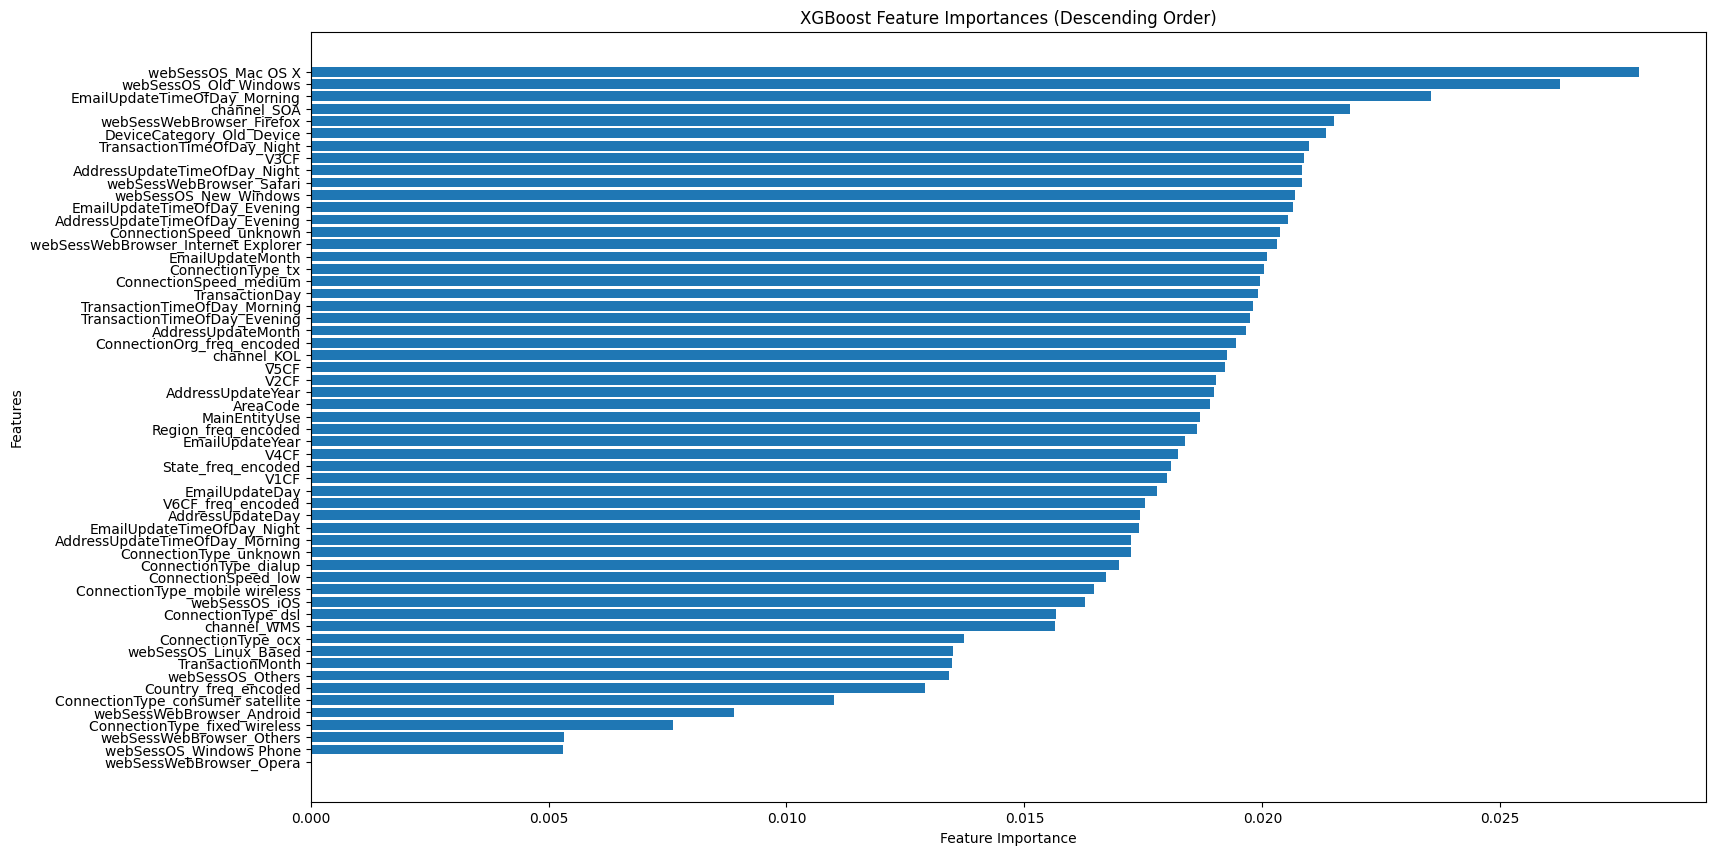

In [149]:
sorted_feature_importances.reverse()
features, importances = zip(*sorted_feature_importances)
plt.figure(figsize=(18, 10))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importances (Descending Order)')
plt.show()

In [ ]:
# Work in Progress - Will attempt to tune the Logistic Regression using cutoff metrics and DecisionTree Classifier using Pre-Post Pruning.
# Tried hyperparameter tuning on every ensemble model using normal data, but the results were unsatisfactory.
# However, it works well if sampling techniques like SMOTE or ADASYN are used.